<h1>Classification with TensorFlow</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [2]:
df = pd.read_csv('./data_sets/cancer_classification.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [4]:
df.isnull().sum().sort_values(ascending=False)

mean radius                0
concavity error            0
worst fractal dimension    0
worst symmetry             0
worst concave points       0
worst concavity            0
worst compactness          0
worst smoothness           0
worst area                 0
worst perimeter            0
worst texture              0
worst radius               0
fractal dimension error    0
symmetry error             0
concave points error       0
compactness error          0
mean texture               0
smoothness error           0
area error                 0
perimeter error            0
texture error              0
radius error               0
mean fractal dimension     0
mean symmetry              0
mean concave points        0
mean concavity             0
mean compactness           0
mean smoothness            0
mean area                  0
mean perimeter             0
benign_0__mal_1            0
dtype: int64

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

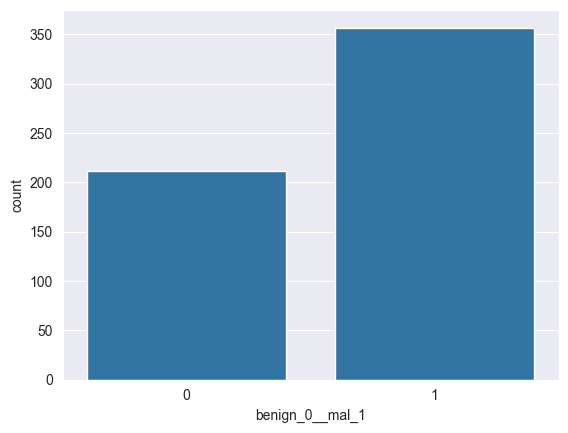

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

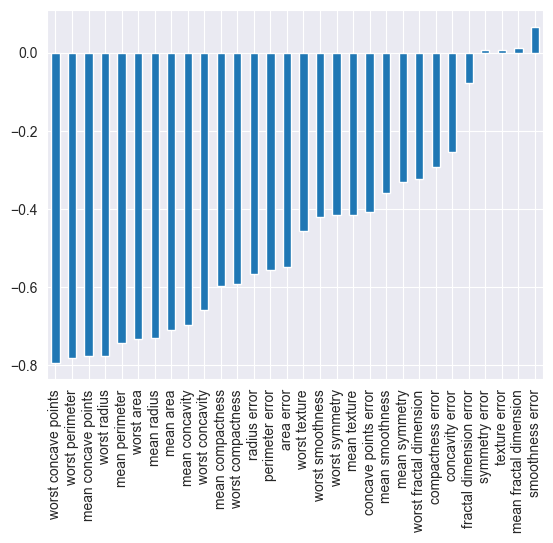

In [6]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<Axes: >

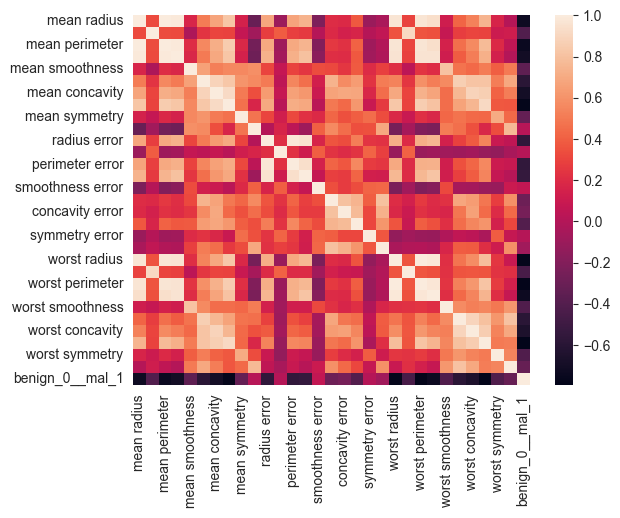

In [7]:
sns.heatmap(df.corr())

In [8]:
X = df.drop('benign_0__mal_1', axis=1).values
y=df.benign_0__mal_1.values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [15]:
X_train.shape

(426, 30)

In [16]:
model = Sequential()

In [24]:
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# Binary classification
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [25]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.6706 - val_loss: 0.6451
Epoch 2/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6210 - val_loss: 0.6094
Epoch 3/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5841 - val_loss: 0.5743
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5485 - val_loss: 0.5491
Epoch 5/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5141 - val_loss: 0.5151
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4816 - val_loss: 0.4903
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4522 - val_loss: 0.4729
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4238 - val_loss: 0.4292
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3961 - val_loss: 0.4155
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3641 - val_loss: 0.3879
Epoch 11

In [26]:
loss = pd.DataFrame(model.history.history)

In [27]:
loss

,loss,val_loss
0,0.670595,0.645109
1,0.621009,0.609354
2,0.584142,0.574262
3,0.548476,0.549102
4,0.514125,0.515095
...,...,...
595,0.000029,0.509028
596,0.000028,0.513090
597,0.000030,0.513607
598,0.000027,0.510005


<Axes: >

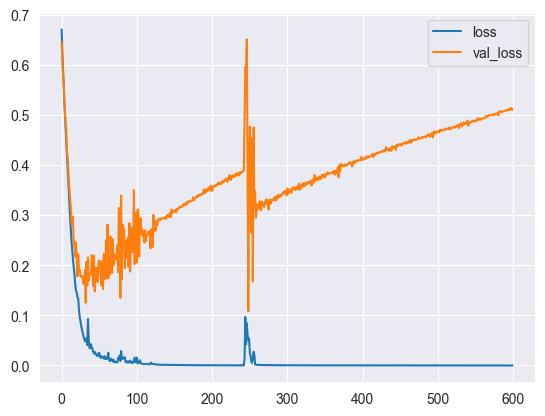

In [28]:
loss.plot()